# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [1]:
from xml.etree import ElementTree 
import numpy
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [2]:
# Each document is an element that has a tag, attributes and children
document = ElementTree.parse( './data/mondial_database_less.xml' )

In [3]:
# finding attributes of element
for countries in document.getroot():
    print (countries.attrib)

{'memberships': 'org-BSEC org-CEI org-CD org-SELEC org-CE org-EAPC org-EBRD org-EITI org-FAO org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICCt org-Interpol org-IDA org-IFRCS org-IFC org-IFAD org-ILO org-IMO org-IMF org-IOC org-IOM org-ISO org-OIF org-ITU org-ITUC org-IDB org-MIGA org-NATO org-OSCE org-OPCW org-OAS org-OIC org-PCA org-UN org-UNCTAD org-UNESCO org-UNIDO org-UPU org-WCO org-WFTU org-WHO org-WIPO org-WMO org-UNWTO org-WTO', 'area': '28750', 'car_code': 'AL', 'capital': 'cty-Albania-Tirane'}
{'memberships': 'org-AG org-BIS org-BSEC org-CD org-SELEC org-CE org-EMU org-EAPC org-EBRD org-ECB org-EIB org-CERN org-ESA org-EU org-FATF org-FAO org-IGAD org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICJ org-ICCt org-Interpol org-IDA org-IEA org-IFRCS org-IFC org-IFAD org-IHO org-ILO org-IMO org-IMSO org-IMF org-IOC org-IOM org-OIF org-ITSO org-ITU org-ITUC org-MIGA org-NATO org-NEA org-NSG org-OECD org-OSCE org-OPCW org-OAS org-PCA org-UN org-UNCTAD org-UNESCO org-UNHCR org-UNIDO

In [4]:
# finding tags of elements
for countries in document.getroot():
    print (countries.tag)

country
country
country
country
country
country
country


In [5]:
# finding the value of a element's children
for countries in document.findall('country'):
    print (countries.find('name').text)

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [6]:
# If  Iapply the former to population,
# this reads the first line only. Note that population
# is a children with more than one elements and it also has attributes.
# Therefore, it's necesary iterate over population. This can be done 
# with element.findall or element.iter 
for countries in document.findall('country'):
    print (countries.find('population').text)

1214489
1096810
808724
6732256
311341
1584440
6197


In [8]:
# print names of all countries and their cities
for countries in document.findall('country'):
    country= countries.find('name').text
    for cities in countries.iter('city'):
        city= cities.get('id')
#        print (country, city)
        

In [10]:
# print names of all countries and their cities with population
for countries in document.findall('country'):
    country= countries.find('name').text
    for cities in countries.iter('city'):
        city= cities.find('name').text      
        for population in cities.iter('population'):
            year= population.get('year')
            pop= population.text 
#            print (country, city, year, pop)
           

****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [11]:
document = ElementTree.parse( './data/mondial_database.xml' )

In [12]:
# 1. 10 countries with the lowest infant mortality rates
data= []
for countries in document.findall('country'):
    country= countries.find('name').text
    mortality= countries.find('infant_mortality')
    # I have to put nan to the empty values
    if mortality is not None:
        mortality= mortality.text
    else:
        mortality = numpy.nan
    data.append([country, mortality])
infant_mortality = pd.DataFrame(data, 
                                columns=['Country', 'Mortality_rate'])


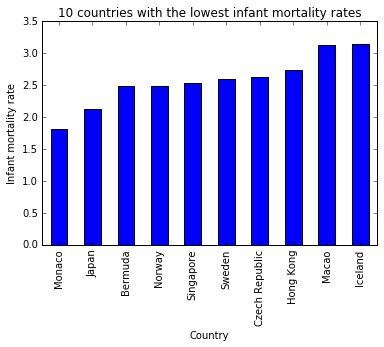

In [13]:
# I will drop data with no values
# Since mortality rate is a string, I have to convert it into float numbers
infant_mortality= infant_mortality.dropna()
infant_mortality.Mortality_rate= infant_mortality.Mortality_rate.astype(float)
infant_mortality= infant_mortality.sort_values(by='Mortality_rate', 
                                               ascending=True)
infant_mortality= infant_mortality.head(10)
ax= infant_mortality.plot(kind='bar', x= 'Country', y= 'Mortality_rate', 
                          legend= False)
ax.set_ylabel('Infant mortality rate')
ax.set_title('10 countries with the lowest infant mortality rates')

In [14]:
# 2. 10 cities with the largest population
data1= []
for countries in document.findall('country'):
    country= countries.find('name').text
    for cities in countries.findall('city'):
        city= cities.find('name').text
        for populations in cities.findall('population'):
            year= populations.get('year')
            population= populations.text
            data1.append([country, city, year, population])
population_world1= pd.DataFrame(data1, 
                               columns=['country', 'city', 'year', 'population'])   
# converting text data into float numbers
population_world1.year= population_world1.year.astype(int)
population_world1.population= population_world1.population.astype(int)
#population_world1.head()

In [15]:
# I have to add the countries with provinces that have cities
data2= []
for countries in document.findall('country'):
    country= countries.find('name').text
    for provinces in countries.findall('province'):
        for cities in provinces.findall('city'):
            city= cities.find('name').text
            for populations in cities.findall('population'):
                year= populations.get('year')
                population= populations.text
                data2.append([country, city, year, population])
population_world2= pd.DataFrame(data2, 
                               columns=['country', 'city', 'year', 'population'])   
population_world2.year= population_world2.year.astype(int)
population_world2.population= population_world2.population.astype(int)
#population_world2.head()

In [16]:
population_world= population_world1.append(population_world2,
                                           ignore_index=True)

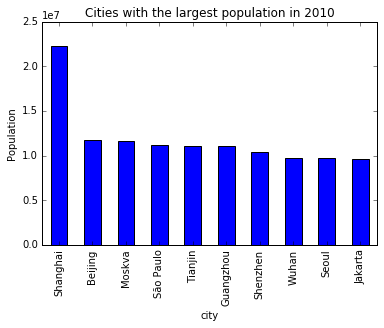

In [17]:
# 10 cities with the largest population in 2010
populated= population_world[population_world.year==2010]
populated= populated.sort_values(by='population', ascending=False)
populated= populated.head(10)
ax= populated.plot(kind='bar', x= 'city', y='population', legend=False)
ax.set_ylabel('Population')
ax.set_title('Cities with the largest population in 2010')

In [18]:
# 3. 10 ethnic groups with the largest overall populations 
# (sum of best/latest estimates over all countries)


In [19]:
data3= []
for countries in document.findall('country'):
    country= countries.find('name').text
    year=[]
    population= []
    for pop in countries.findall('population'):
        year.append(pop.get('year'))
        population.append(pop.text)
    for etnic in countries.findall('ethnicgroup'):
        percent= etnic.get('percentage')
        group= etnic.text
        data3.append([country, year[-1], population[-1], group, percent])

ethnic_groups= pd.DataFrame(data3, 
                            columns=['country', 
                                     'latest_year', 
                                     'total_population', 
                                     'ethnic_group',
                                     'percentage']) 
ethnic_groups.latest_year= ethnic_groups.latest_year.astype(int)
ethnic_groups.total_population= ethnic_groups.total_population.astype(int)
ethnic_groups.percentage= ethnic_groups.percentage.astype(float)

In [20]:
ethnic_groups['ethnic_population']= (ethnic_groups.percentage*ethnic_groups.total_population)/100.
most= pd.DataFrame( ethnic_groups.groupby('ethnic_group').ethnic_population.sum() ).reset_index()

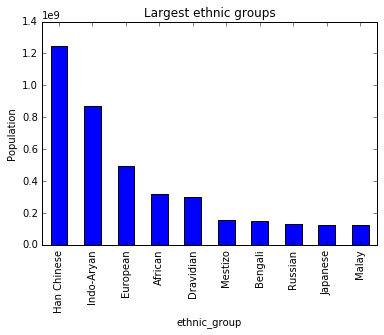

In [21]:
most= most.sort_values(by='ethnic_population', ascending= False)
most1= most.head(10)
ax= most1.plot(kind='bar', x= 'ethnic_group', y='ethnic_population', 
               legend= False)
ax.set_ylabel('Population')
ax.set_title('Largest ethnic groups')

In [22]:
# 4. name and country of 
# a) longest river, 
# b) largest lake and 
# c) airport at highest elevation

In [34]:
river_data=[]
for rivers in document.iter('river'):
    river_name= rivers.find('name').text
    country_code= rivers.get('country')
    length= rivers.find('length')
    if length is not None:
        length= length.text
    else:
        length= numpy.nan
    river_data.append([river_name, country_code, length])

river_data= pd.DataFrame(river_data, columns= ['river_name',
                                               'country_code', 'length'])
river_data.length= river_data.length.astype(float)
river_data= river_data.sort_values(by='length', ascending=False)
#river_data[river_data.river_name.str.contains('N')]
river_data.head(1)

,river_name,country_code,length
174,Amazonas,CO BR PE,6448.0


In [ ]:
#According to the data, the longest river is the Amazonas, with 6.4 km 
#This river crosses three countries: Colombia, Brasil and Peru.
# The Nile river is not shown here, because we don't have its length

In [43]:
def chose(pointer):
    if pointer is not None:
        pointer= pointer.text
    else:
        pointer= numpy.nan
    return pointer

In [53]:
lake_data=[]
for lakes in document.iter('lake'):
    lake_name= lakes.find('name').text
    country_code= lakes.get('country')
    area= chose(lakes.find('area'))
    depth= chose(lakes.find('depth'))
    lake_data.append([lake_name, country_code, area, depth])
lake_data= pd.DataFrame(lake_data, columns= ['lake_name',
                                             'country_code', 
                                             'area','depth'])
lake_data.area= lake_data.area.astype(float) 
lake_data.depth= lake_data.depth.astype(float)
lake_data= lake_data.sort_values(by='area', ascending=False)
lake_data.head(1)

,lake_name,country_code,area,depth
54,Caspian Sea,R AZ KAZ IR TM,386400.0,995.0


In [ ]:
# According to the data, the longest lake is the Caspina sea,
# with an area of 386000 m^2. This lake belongs to four countries:
# Russia, Kazakhstan, Iran, Turkmenistan

In [59]:
airport_data=[]
for airp in document.iter('airport'):
    airp_name= airp.find('name').text
    country= airp.get('country')
    city= airp.get('city')
    elevation= airp.find('elevation').text
    airport_data.append([airp_name, country, city, elevation])
airport_data= pd.DataFrame(airport_data, columns= ['airport_name',
                                                   'country', 
                                                   'city','elevation']) 
airport_data.elevation= airport_data.elevation.astype(float)
airport_data= airport_data.sort_values(by='elevation', ascending=False)
airport_data.head(1)

,airport_name,country,city,elevation
80,El Alto Intl,BOL,cty-BOL-1,4063.0


In [ ]:
# According to thedata, the airport with highest elevation
# is El alto Inti, located in Bolivia, with an elevation of 4063 meters
# above the sea level.